# Dans Diffraction
This notebook goes over some basic features of the package

You must start the Jupyter notebook/ Jupyter lab server in this directory!

In [1]:
%matplotlib notebook
import sys, os
import numpy as np
import matplotlib.pyplot as plt

# Add Dans_Diffraction location to python path 
# (not required if you are in the right directory or if Dans_Diffraction is installed through PIP)
sys.path.insert(0, os.path.abspath('.'))
import Dans_Diffraction as dif

print(dif.module_info())

Python version 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
Dans_Diffraction version 3.0.0 (25/06/23)
     numpy version: 1.21.4
matplotlib version: 3.1.1
   tkinter version: 8.6
     scipy version: 1.7.1


### Basic Operations
The crystal structure is created as a *Crystal* object.

Crystal objects have the follwing sub-classes:

**Crystal.**
- **Cell** - contains the lattice parameters and methods associated
- **Atoms** - contains details of the atoms at symmetric sites and methods associated
- **Structure** - contains details of the atoms at all sites (P1 symmetry)
- **Properties** - contains methods to calcualte various crystal properties
- **Scatter** - contains methods to calculate structure factors, diffraction patterns etc.
- **Plot** - contains methods to plot various things

In [2]:
# Load a structure
xtl = dif.structure_list.LiCoO2()
print(xtl)


###########################################
LiCoO2
Formula: LiCoO2
Magnetic: False
a =  2.824 A,  b =  2.824 A,  c = 13.888 A
A =    90.00,  B =    90.00,  G =   120.00
Volume:  95.92 A^3

Density:  5.083 g/cm
  n Label Atom  u       v       w        Occ  Uiso
  0   Li1   Li  0.0000  0.0000  0.0000   1.00 0.0203
  1   Li1   Li  0.6667  0.3333  0.3333   1.00 0.0203
  2   Li1   Li  0.3333  0.6667  0.6667   1.00 0.0203
  3   Co1   Co  0.0000  0.0000  0.5000   1.00 0.0114
  4   Co1   Co  0.6667  0.3333  0.8333   1.00 0.0114
  5   Co1   Co  0.3333  0.6667  0.1667   1.00 0.0114
  6    O1    O  0.0000  0.0000  0.2459   1.00 0.0143
  7    O1    O  0.0000  0.0000  0.7541   1.00 0.0143
  8    O1    O  0.6667  0.3333  0.5792   1.00 0.0143
  9    O1    O  0.6667  0.3333  0.0874   1.00 0.0143
 10    O1    O  0.3333  0.6667  0.9126   1.00 0.0143
 11    O1    O  0.3333  0.6667  0.4208   1.00 0.0143




In [3]:
# Cell Lattice parameters
# Get lattice (lengths in Angstrom, angles in degrees)
print(xtl.Cell)
a, b, c, alpha, beta, gamma = xtl.Cell.lp()
# Set lattice
xtl.Cell.latt(a=a, b=b, c=c, alpha=alpha, beta=beta, gamma=gamma)


a =  2.824 A,  b =  2.824 A,  c = 13.888 A
A =    90.00,  B =    90.00,  G =   120.00
Volume:  95.92 A^3



In [4]:
# Edit the atomic positions
print(xtl.Atoms)
xtl.Atoms.changeatom(0, occupancy=0.5)
# Now apply this to the whole structure
xtl.generate_structure()
print('\nUpdated structure:')
print(xtl.Structure)

  n Label Atom  u       v       w        Occ  Uiso
  0   Li1   Li  0.0000  0.0000  0.0000   1.00 0.0203
  1   Co1   Co  0.0000  0.0000  0.5000   1.00 0.0114
  2    O1    O  0.0000  0.0000  0.2459   1.00 0.0143


Updated structure:
  n Label Atom  u       v       w        Occ  Uiso
  0   Li1   Li  0.0000  0.0000  0.0000   0.50 0.0203
  1   Li1   Li  0.6667  0.3333  0.3333   0.50 0.0203
  2   Li1   Li  0.3333  0.6667  0.6667   0.50 0.0203
  3   Co1   Co  0.0000  0.0000  0.5000   1.00 0.0114
  4   Co1   Co  0.6667  0.3333  0.8333   1.00 0.0114
  5   Co1   Co  0.3333  0.6667  0.1667   1.00 0.0114
  6    O1    O  0.0000  0.0000  0.2459   1.00 0.0143
  7    O1    O  0.0000  0.0000  0.7541   1.00 0.0143
  8    O1    O  0.6667  0.3333  0.5792   1.00 0.0143
  9    O1    O  0.6667  0.3333  0.0874   1.00 0.0143
 10    O1    O  0.3333  0.6667  0.9126   1.00 0.0143
 11    O1    O  0.3333  0.6667  0.4208   1.00 0.0143



### Calculate reflections

In [5]:
f = os.path.abspath('./Dans_Diffraction/Structures/Silicon.cif')
xtl = dif.Crystal(f)

# Get all reflections in the Ewald sphere - Miller Indices h,k,l
hkl = xtl.Scatter.get_hkl(energy_kev=8)

# Calculate intensities
intensity = xtl.Scatter.intensity()

print('hkl = %s\nintensity = %s' % (hkl, intensity))

hkl = [[ 0. -1.  0.]
 [ 0.  0.  1.]
 [-1.  0.  0.]
 ...
 [-3. -6. -2.]
 [-6.  3. -2.]
 [-7.  0.  0.]]
intensity = [2.52435490e-29 2.52435490e-29 2.52435490e-29 ... 2.14570166e-28
 1.55563371e-27 7.60461913e-28]


### Print a reflection list

In [6]:
f = os.path.abspath('./Dans_Diffraction/Structures/Diamond.cif')
xtl = dif.Crystal(f)

xtl.Scatter.setup_scatter(scattering_type='x-ray', energy_kev=8.0, output=False)
print("Reflections")
print(xtl.Scatter.print_all_reflections(print_symmetric=False, min_intensity=0.01, units='tth'))
print("Extinctions")
print(xtl.Scatter.print_all_reflections(print_symmetric=False, min_intensity=None, max_intensity=0.01, units='tth'))


Reflections
Energy =  8.000 keV
Radiation: x-ray
( h, k, l)      TwoTheta  Intensity
(  1,  1,  1)      44.21     293.36
(  2,  2,  0)      75.83     246.05
(  3,  1,  1)      92.20      98.93
(  4,  0,  0)     120.69     161.51
(  3,  3,  1)     142.52      74.30
Reflections: 5

Extinctions
Energy =  8.000 keV
Radiation: x-ray
( h, k, l)      TwoTheta  Intensity
(  1,  0,  0)      25.10       0.00
(  1,  1,  0)      35.79       0.00
(  2,  0,  0)      51.51       0.00
(  2,  1,  0)      58.13       0.00
(  2,  1,  1)      64.30       0.00
(  2,  2,  1)      81.35       0.00
(  3,  0,  0)      81.35       0.00
(  3,  1,  0)      86.79       0.00
(  2,  2,  2)      97.63       0.00
(  3,  2,  0)     103.13       0.00
(  3,  2,  1)     108.76       0.00
(  3,  2,  2)     127.21       0.00
(  4,  1,  0)     127.21       0.00
(  4,  1,  1)     134.36       0.00
(  3,  3,  0)     134.36       0.00
(  4,  2,  0)     152.62       0.00
(  4,  2,  1)     169.23       0.00
Reflections: 17



### Calculate different types of scattering, including magnetic scattering

In [7]:
f = os.path.abspath('./Dans_Diffraction/Structures/Ca2RuO4.cif')
en = 2.838  # keV
aziref = [1, 1, 0]

# Create Crystal, assign magnetic moment
xtl = dif.Crystal(f)
xtl.Atoms.changeatom(1, mxmymz=[0, 3, 0.3])
xtl.generate_structure()

xtl.Scatter.setup_scatter(
    energy_kev=en,
    scattering_factors='WaasKirf',  # 'WaasKirf' or 'itc'
    magnetic_formfactor=False,
    polarisation='sp',
    polarisation_vector=(1,0,0),
    azimuthal_reference=aziref,
    azimuth=0,
    flm=(0,1,0)
)

hkl = xtl.Scatter.get_hkl(remove_symmetric=True)
i_xray = xtl.Scatter.intensity(hkl, 'xray')
i_neutron = xtl.Scatter.intensity(hkl, 'neutron')
i_mag_xray = xtl.Scatter.intensity(hkl, 'xray magnetic')
i_mag_neutron = xtl.Scatter.intensity(hkl, 'neutron magnetic')
i_xray_resonant = xtl.Scatter.intensity(hkl, 'xray resonant')

print('%20s %10s %10s %10s %10s %10s' % ('(h, k, l)', 'xray', 'neutron', 'mag. xr', 'mag. n', 'res. xr'))
for ref, i1, i2, i3, i4, i5 in zip(hkl, i_xray, i_neutron, i_mag_xray, i_mag_neutron, i_xray_resonant):
    print('%20s %10.2f %10.2f %10.2f %10.2f %10.2f' % (ref, i1, i2, i4, i4, i5))



Using scattering factors from: "Waasmaier and Kirfel, Acta Cryst. (1995) A51, 416-431"
Scatter(Ca2RuO4 with 4 atomic positions (4 magnetic), 8 symmetries)
       Type: xray
     Energy: 2.838 keV
 Wavelength: 4.368725473176768 A
 ---Settings---
      Powder units: tth
    Isotropic ADPs: True
  Specular Direction (reflection): ( 0, 0, 1)
Parallel Direction (transmission): ( 0, 0, 1)
      theta offset: 0.0
         min theta: -180.0
         max theta: 180.0
      min twotheta: -180.0
      max twotheta: 180.0
 ---X-Ray Settings---
 Waasmaier scattering factor: True
 ---Magnetic Settings---
   Mag. scattering: True
  Mag. form factor: False
         Polarised: False
      Polarisation: sp
       Pol. vector: (1.0,0.0,0.0)
 ---Resonant Settings---
   Azimuthal angle: 0
    Azimuthal ref.: (1.0,1.0,0.0)
               flm: (0,1,0)
  use e1e1 approx.: True

           (h, k, l)       xray    neutron    mag. xr     mag. n    res. xr
          [0. 0. 1.]       0.00       0.00       0.00    

### Plotting a powder pattern

<IPython.core.display.Javascript object>


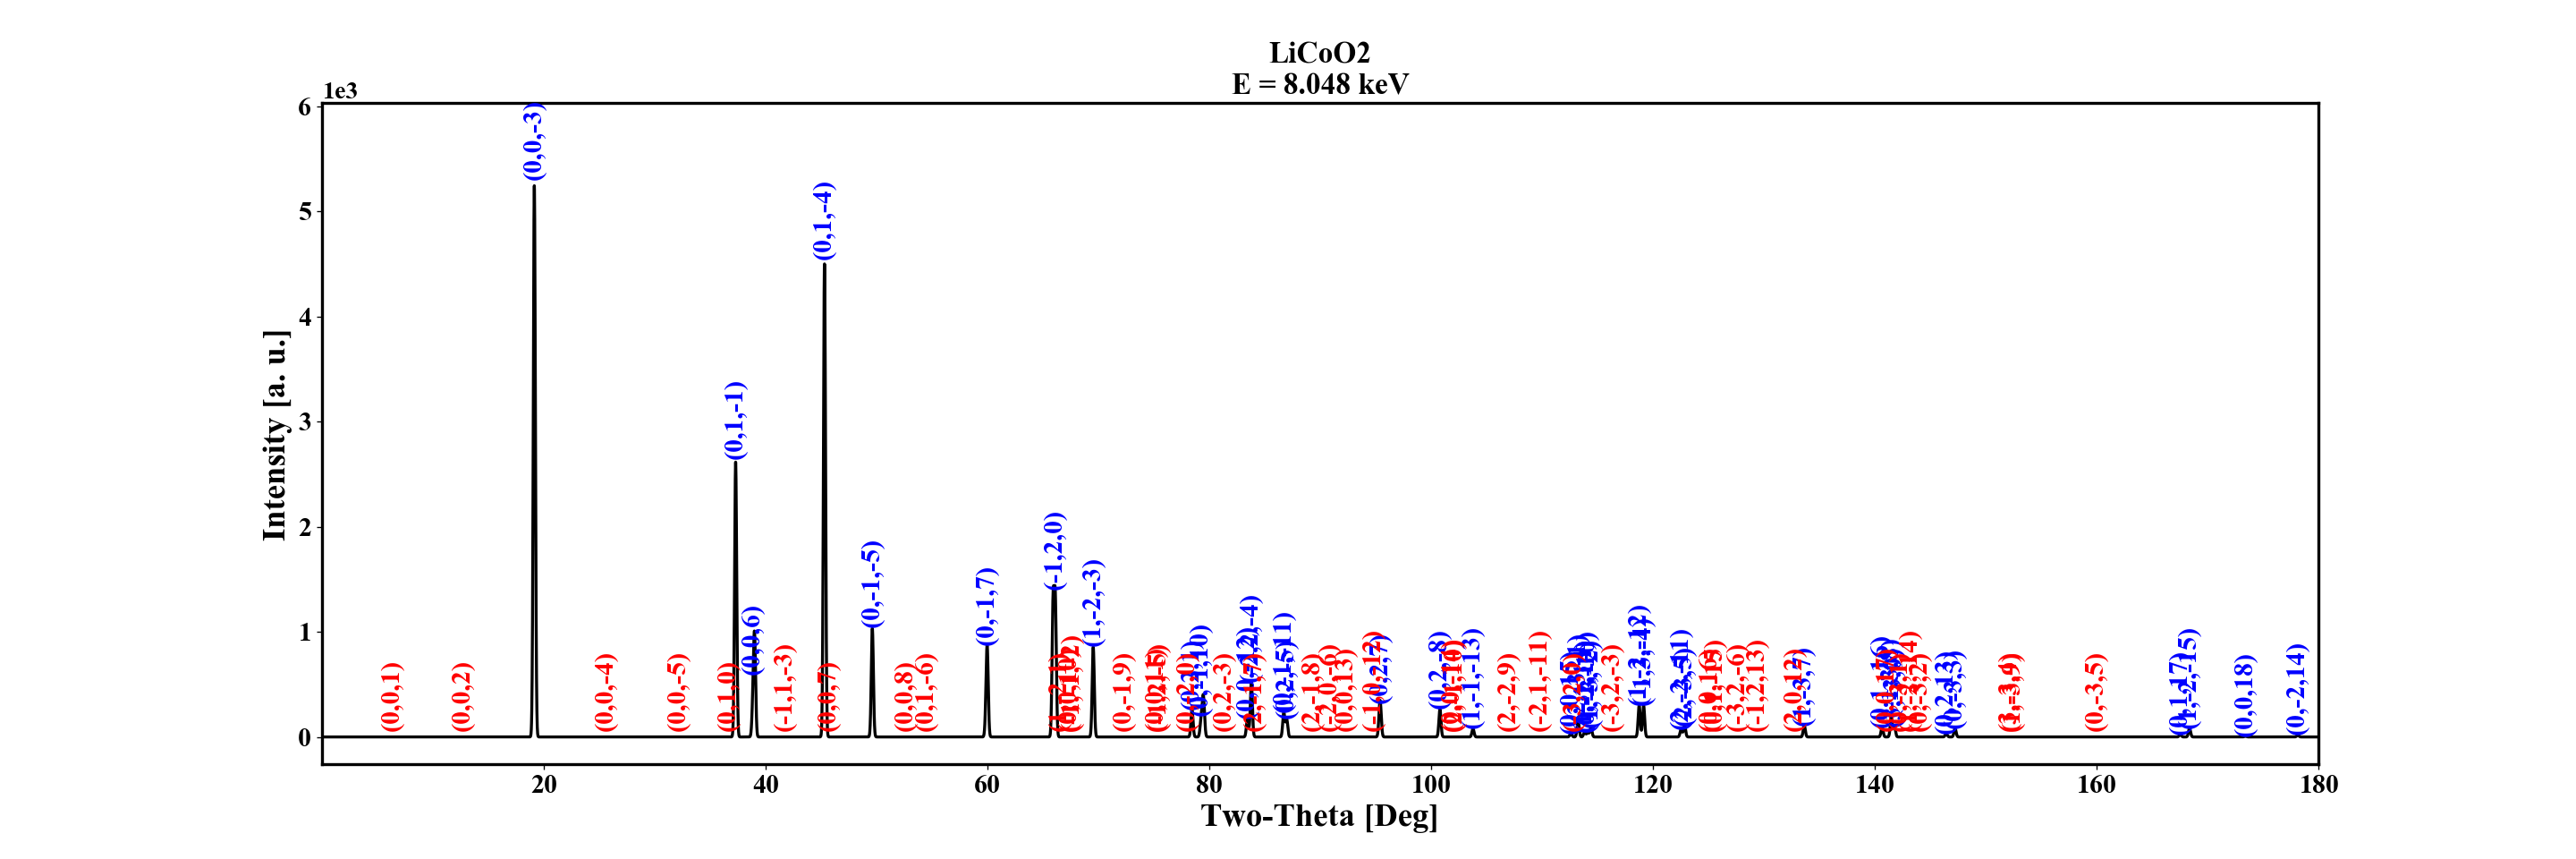

In [14]:
# Automated function to generate powder pattern
xtl = dif.structure_list.LiCoO2()
xtl.Plot.simulate_powder()

<IPython.core.display.Javascript object>


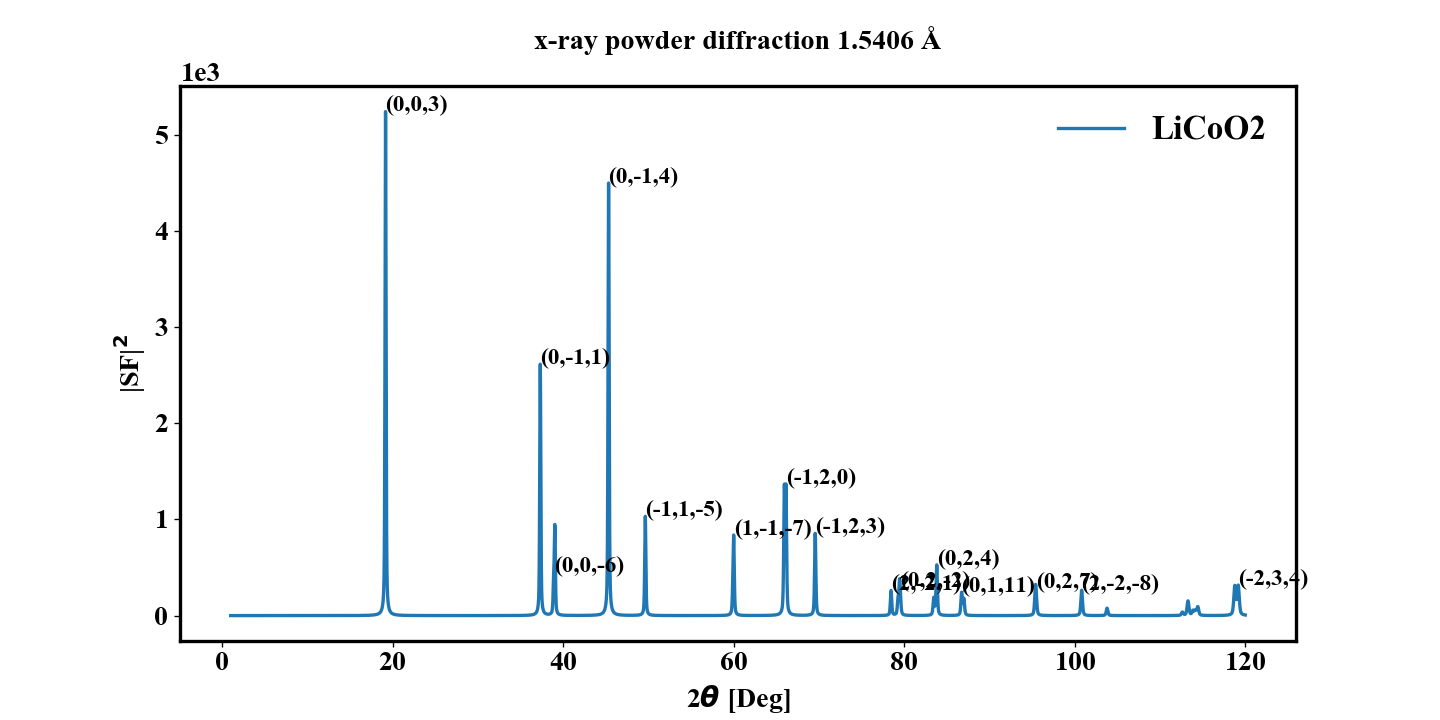

In [15]:
# Or you can plot it yourself using matplotlib
# Set up Scattering Options
source_wavelength = 1.5406 # Å, Copper Kalpha

xtl.Scatter.setup_scatter(
    scattering_type='x-ray',  # 'neutron' and other options available
    powder_units='twotheta',  # options: 'd', 'q', 'twotheta'
    powder_overlap=3, # this determines the spacing of reflection labels - reflections closer than 'powder_overlap' degrees will not be displayed
    wavelength_a=source_wavelength,  # alternative energy_kev option also available
    min_twotheta=0,
    max_twotheta=120,
    output=False
)

# Set matplotlib plotting defaults (see https://matplotlib.org/stable/tutorials/introductory/customizing.html#the-default-matplotlibrc-file)
dif.fp.set_plot_defaults()

# Create a Powder Spectra
tth1, intensity1, ref1 = xtl.Scatter.powder()

# plot the spectra
plt.figure(figsize=[12, 6])
plt.plot(tth1, intensity1, '-', lw=2, label=xtl.name)

for ref in ref1:
    # Only show reflections with large intensity
    if ref[4] > 100:
        plt.text(ref[3], ref[4], '(%1.0f,%1.0f,%1.0f)' % (ref[0], ref[1], ref[2]))

plt.title('x-ray powder diffraction %s Å\n' % (source_wavelength))
plt.xlabel(r'2$\theta$ [Deg]')
plt.ylabel(r'|SF|$^2$')
plt.legend(fontsize=20)

### Simulate plane in recirocal space

<IPython.core.display.Javascript object>


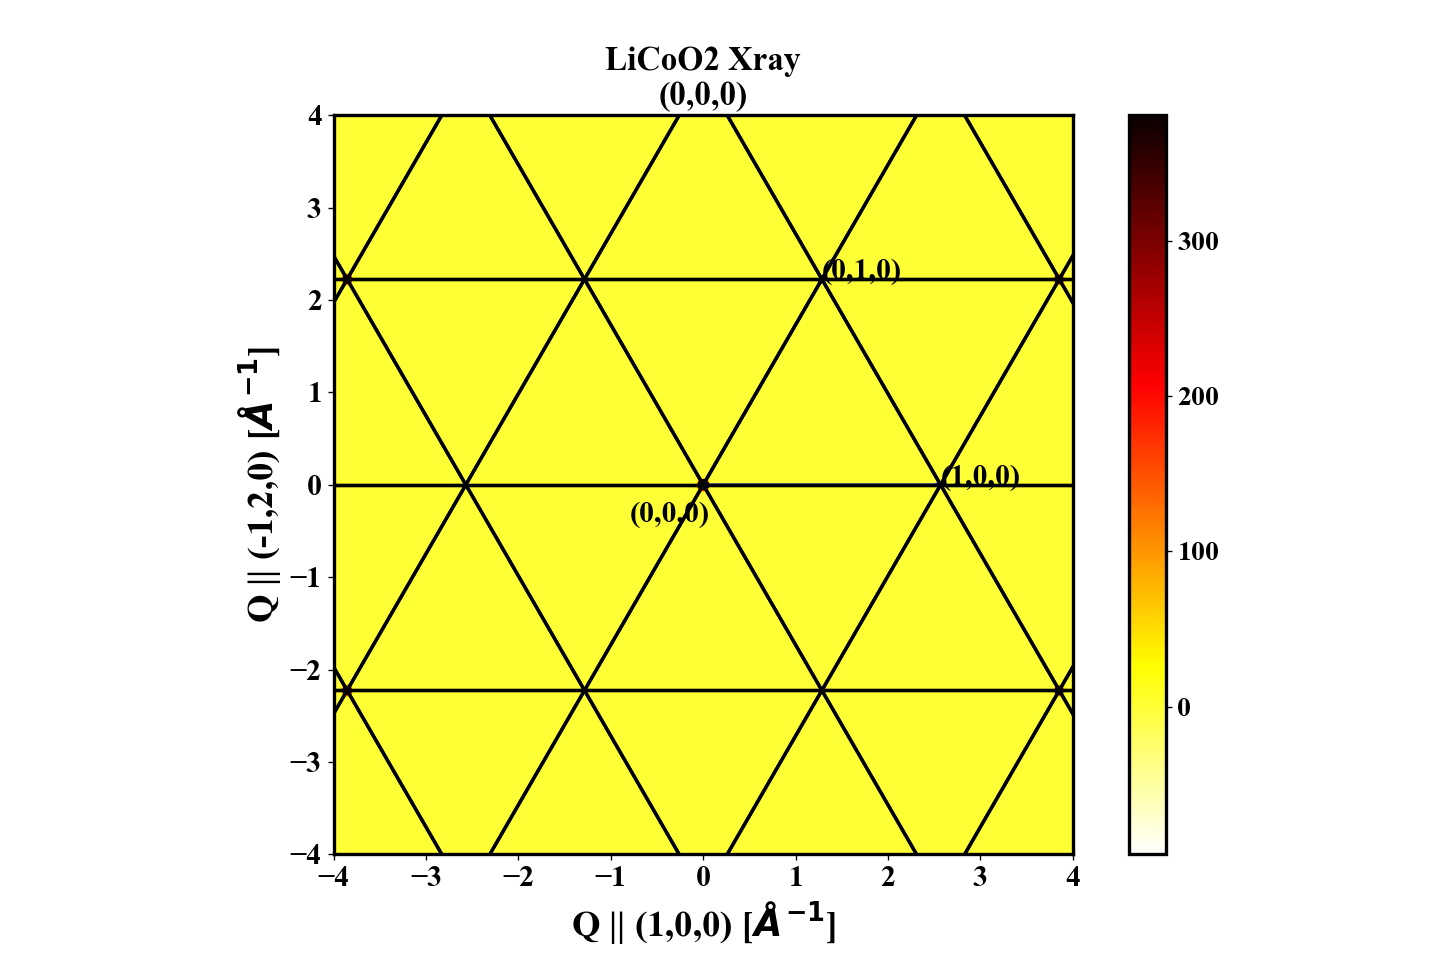

<IPython.core.display.Javascript object>


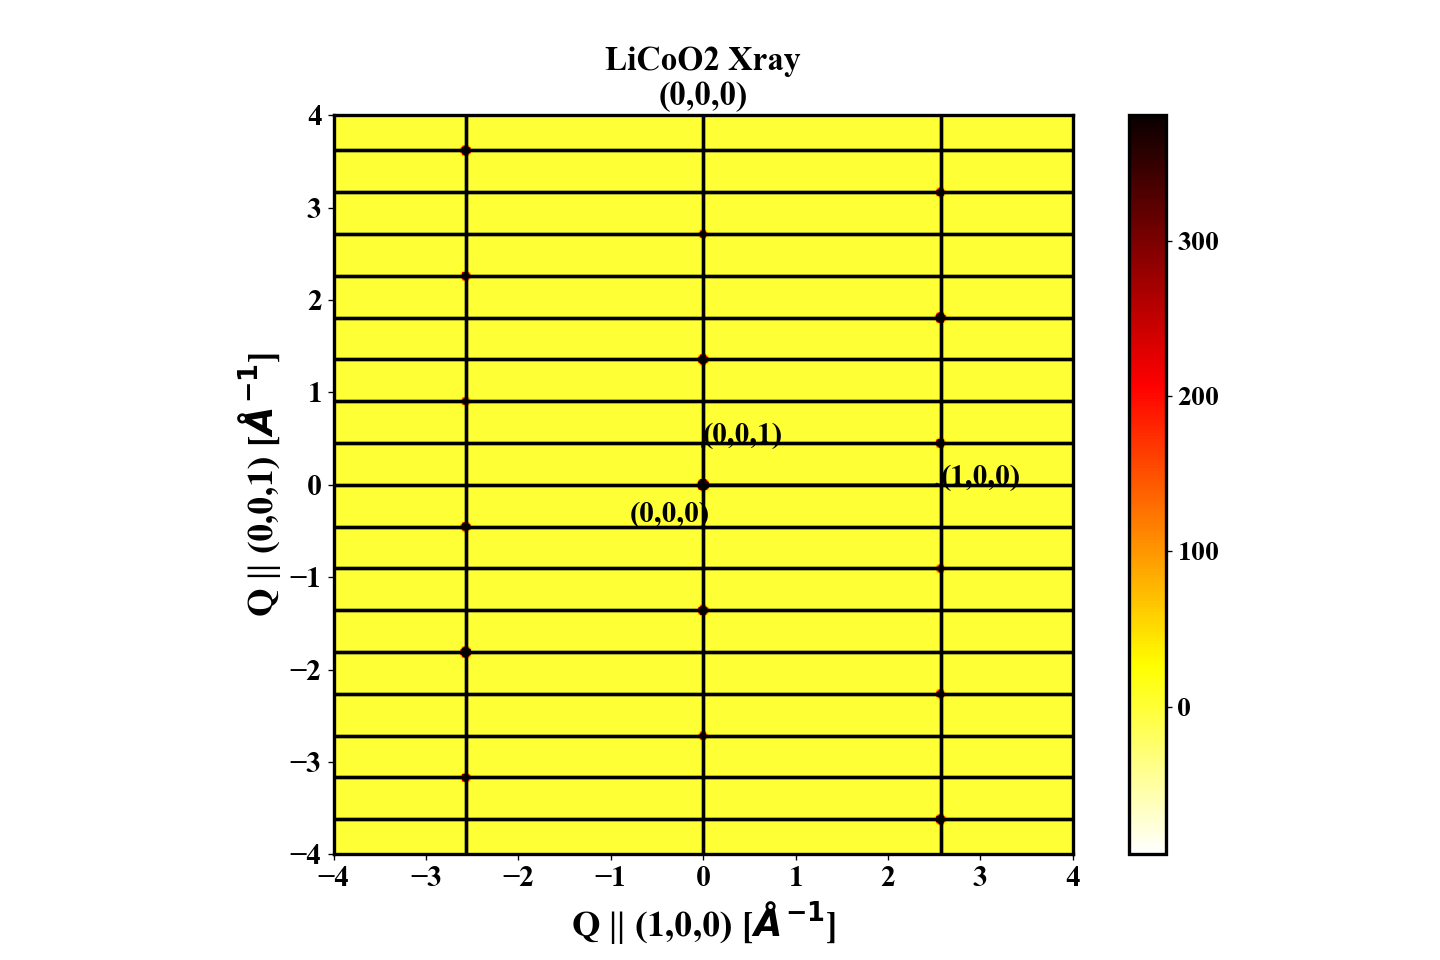

<IPython.core.display.Javascript object>


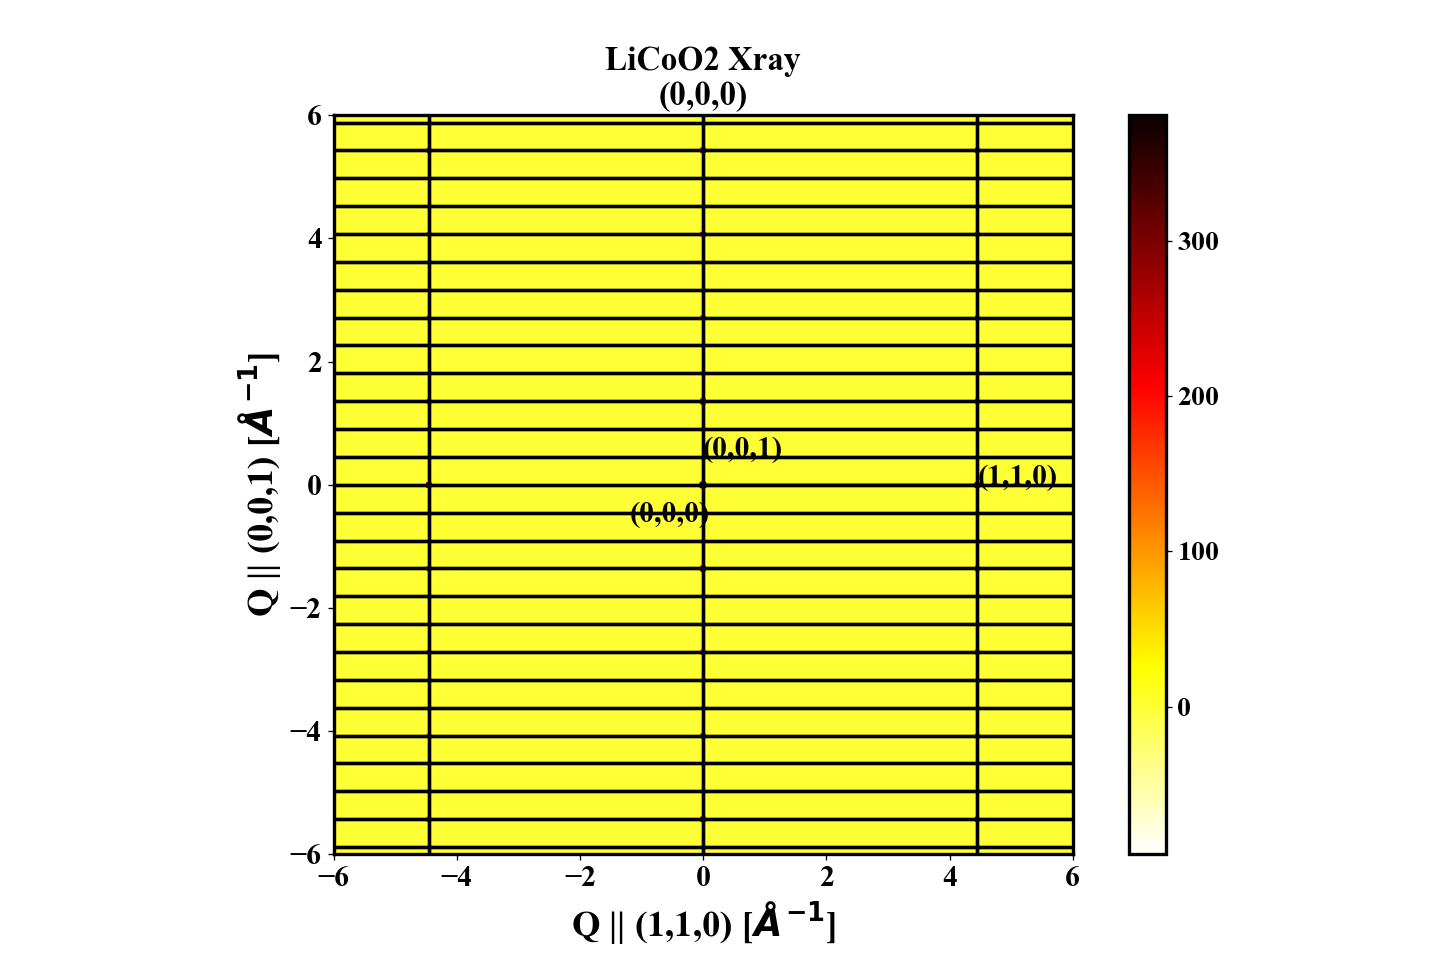

<IPython.core.display.Javascript object>


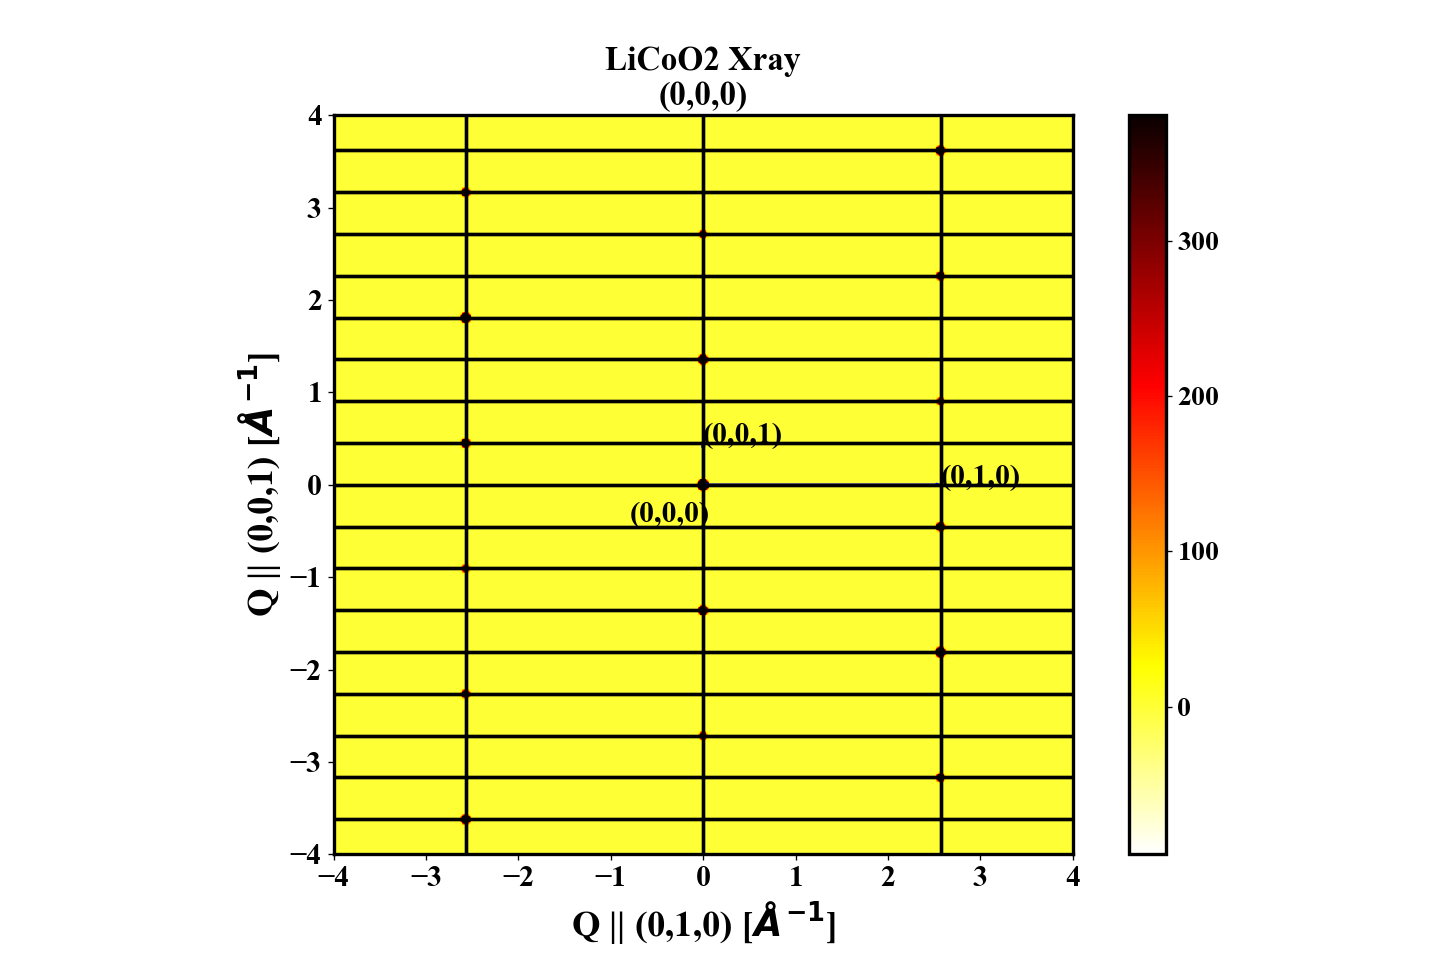

In [16]:
xtl = dif.structure_list.LiCoO2()

xtl.Plot.simulate_hk0(L=0)
xtl.Plot.simulate_h0l(K=0)
xtl.Plot.simulate_hhl(HmH=0,q_max=6)
xtl.Plot.simulate_0kl(H=0)

### Simulate a diffraction pattern on a detector

<IPython.core.display.Javascript object>


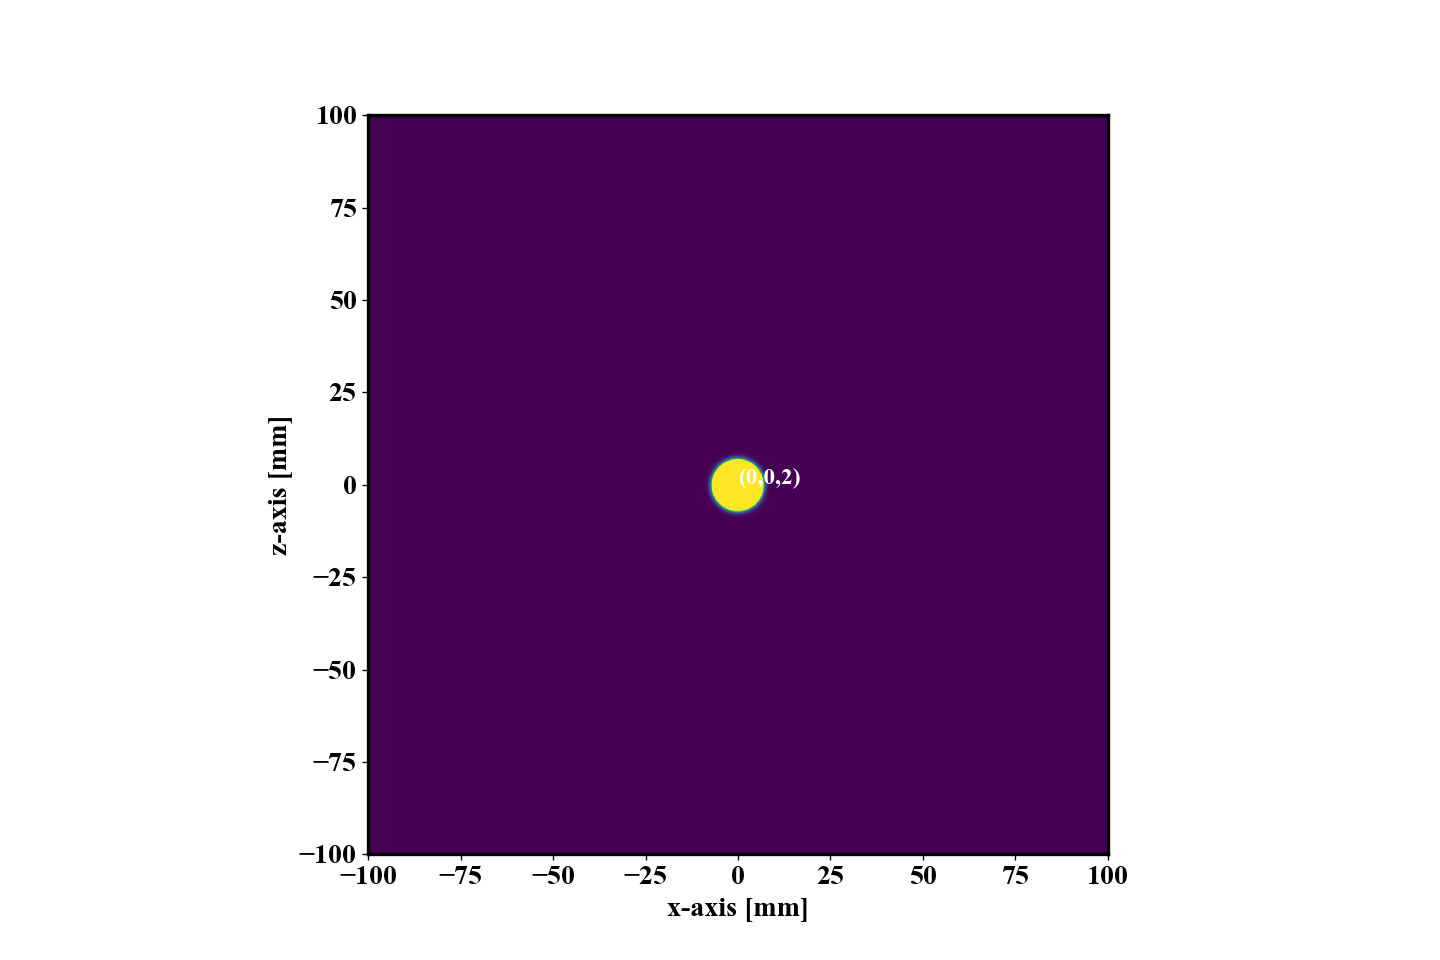

In [12]:
energy_kev = 8
xtl = dif.structure_list.Na08CoO2_P63mmc()

# Reflection
tth = xtl.Cell.tth([0, 0, 2], energy_kev=energy_kev)[0]
# Orient crystal to scattering position
xtl.Cell.orientation.rotate_6circle(mu=tth/2)

# Generate detector image
xx, yy, mesh, reflist = xtl.Scatter.detector_image(
    detector_distance_mm=500,  # mm
    delta=0,
    gamma=tth,
    height_mm=200.,
    width_mm=200.,
    pixel_size_mm=0.1,
    energy_range_ev=1.,
    peak_width_deg=0.5,
    wavelength_a=dif.fc.energy2wave(energy_kev),
    background=0
)

# Plot detector image
plt.figure()
plt.pcolormesh(xx, yy, mesh, vmin=0, vmax=1, shading='auto')
plt.xlabel('x-axis [mm]')
plt.ylabel('z-axis [mm]')
plt.axis('image')
# reflection labels
for n in range(len(reflist['hkl'])):
    plt.text(reflist['detx'][n], reflist['dety'][n], reflist['hkl_str'][n], c='w')

### Example Markdown
Displaying an image in Markdown:

![title](Screenshots/GUI_00.png)

Nice!

Now for some equations!

Here is a nice equation: $n\lambda = d \sin\theta$

And here is a bigger one:
$$\sin\theta=\frac{opp}{hyp}$$
isn't that nice?

In [13]:
# Close interactive cells
#  plt.close('all')